<a href="https://colab.research.google.com/github/Tchuissi/601-Introduction-of-Data-Science/blob/master/ipynb/Final_ML_606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 2: Machine Learning**

In this second part, we will now evaluate the dataset and see how well it predicts house prices.
The goal is to predict a price, which is a continuous value: it's a regression problem.

## **1.Import libraries**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from termcolor import colored as cl

In [48]:
from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## **2. Read the data and select the columns for ML**

In [50]:
# Read the first dataset

df1 = pd.read_csv("residential.csv", usecols=['BATHRM','ROOMS','BEDRM','GBA','HEAT','STORIES','STRUCT','EXTWALL','INTWALL','ROOF','PRICE'])
df1.head()

,BATHRM,HEAT,ROOMS,BEDRM,STORIES,PRICE,GBA,STRUCT,EXTWALL,ROOF,INTWALL
0,2.0,13.0,8.0,4.0,2.0,1225000.0,1742,7.0,14.0,2.0,6.0
1,1.0,8.0,6.0,3.0,2.0,882500.0,1132,7.0,14.0,2.0,6.0
2,3.0,8.0,10.0,4.0,3.0,1250000.0,2284,6.0,14.0,2.0,6.0
3,1.0,1.0,4.0,2.0,2.0,0.0,702,6.0,14.0,2.0,6.0
4,2.0,7.0,6.0,2.0,2.0,780000.0,648,7.0,14.0,2.0,6.0


In [51]:
df1.shape

(108229, 11)

In [52]:
df1 = df1.dropna()
df1.shape

(92056, 11)

In [53]:
df1.dtypes

BATHRM     float64
HEAT       float64
ROOMS      float64
BEDRM      float64
STORIES    float64
PRICE      float64
GBA          int64
STRUCT     float64
EXTWALL    float64
ROOF       float64
INTWALL    float64
dtype: object

In [54]:
df1['BATHRM'] = df1['BATHRM'].astype('int64')
df1['ROOMS'] = df1['ROOMS'].astype('int64')
df1['BEDRM'] = df1['BEDRM'].astype('int64')
df1['PRICE'] = df1['PRICE'].astype('int64')
df1['HEAT'] = df1['HEAT'].astype('int64')
df1['STORIES'] = df1['STORIES'].astype('int64')
df1['STRUCT'] = df1['STRUCT'].astype('int64')
df1['EXTWALL'] = df1['EXTWALL'].astype('int64')
df1['INTWALL'] = df1['INTWALL'].astype('int64')
df1['ROOF'] = df1['ROOF'].astype('int64')

df1.dtypes

BATHRM     int64
HEAT       int64
ROOMS      int64
BEDRM      int64
STORIES    int64
PRICE      int64
GBA        int64
STRUCT     int64
EXTWALL    int64
ROOF       int64
INTWALL    int64
dtype: object

In [55]:
df1=df1.sample(5000)

df1.shape

(5000, 11)

##**3. Split Dataset and standardization**

We will split the dataset with the 80/20: 80% for the the training data and 20% for the test data.
We will have 10 features and 1 target, the price

In [56]:
# FEATURE SELECTION & DATA SPLIT

X_var = df1[['BATHRM', 'ROOMS', 'BEDRM', 'GBA','HEAT','STRUCT','STORIES','EXTWALL','INTWALL','ROOF']].values
y_var = df1['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 1)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
from textwrap import indent
independant_scaler= StandardScaler()
X_train=independant_scaler.fit_transform(X_train)
X_test = independant_scaler.transform(X_test)

## **4. Assessing features importance with Random Forest**

First, let's measure the feature importance by using the Random Forest ensemble technique

 1) GBA                            0.376409
 2) ROOMS                          0.124087
 3) ROOF                           0.085116
 4) STRUCT                         0.080127
 5) BEDRM                          0.078361
 6) EXTWALL                        0.066514
 7) INTWALL                        0.057655
 8) HEAT                           0.053200
 9) BATHRM                         0.050931
10) STORIES                        0.027601


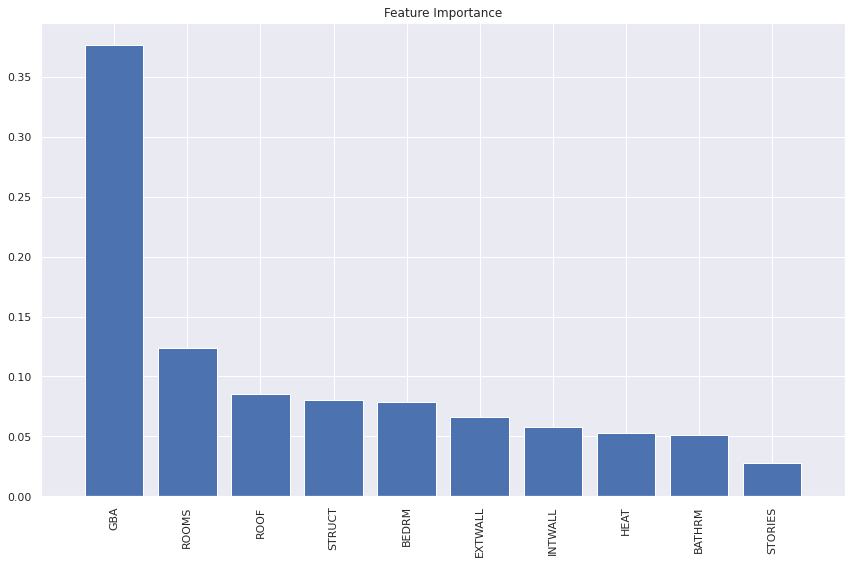

In [174]:
from sklearn.ensemble import RandomForestClassifier

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)
df2= df1[['BATHRM', 'ROOMS', 'BEDRM', 'GBA','HEAT','STRUCT','STORIES','EXTWALL','INTWALL','ROOF']]

feat_labels = df2.columns

forest = RandomForestClassifier(n_estimators=30,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

- The Gross Building Area (GBA) is the most important feature (37%)
- The number of rooms (13%)
- The roof type (8,6%)
- Structure type (8,2%)
- External wall type (7,2%)

## **5.Machine Learning Techniques**

For all the techniques, our two metrics will be the following:

- **R-squared or Coefficient of Determination (R2)**: This metric represents the part of the variance of the dependent variable explained by the independent variables of the model. It measures the strength of the relationship between your model and the dependent variable
- **Mean Absolute Error (MAE)**: This metric evaluates the mean of the absolute values of each prediction error on all instances of the test data-set. Prediction error is the difference between the actual value and the predicted value for that instance.

### **5.a Linear Regression model: Ordinal Least Square (OLS)**

Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line

In [13]:
LinearRegModel= LinearRegression(n_jobs=-1)
LinearRegModel.fit(X_train,y_train)
print('Intercept is '+str(LinearRegModel.intercept_))
print('coefficient is '+str(LinearRegModel.coef_))

Intercept is 461264.89875
coefficient is [175785.10172157 -99496.57394865 -24626.2464152  298647.89878415
 -39522.7402266   62913.86771404 -20168.65026089 -11723.21667313
  -6698.04248602  55339.72783233]


In [14]:
y_pred = LinearRegModel.predict(X_test)

In [15]:
print(len(y_pred))
print(len(y_test))
print(y_pred[0:5])
print(y_test[0:5])

1000
1000
[228805.64727351 376692.43020937 199878.31541999  99102.65431701
 471468.28262814]
[118600 140000 260000  90799      0]


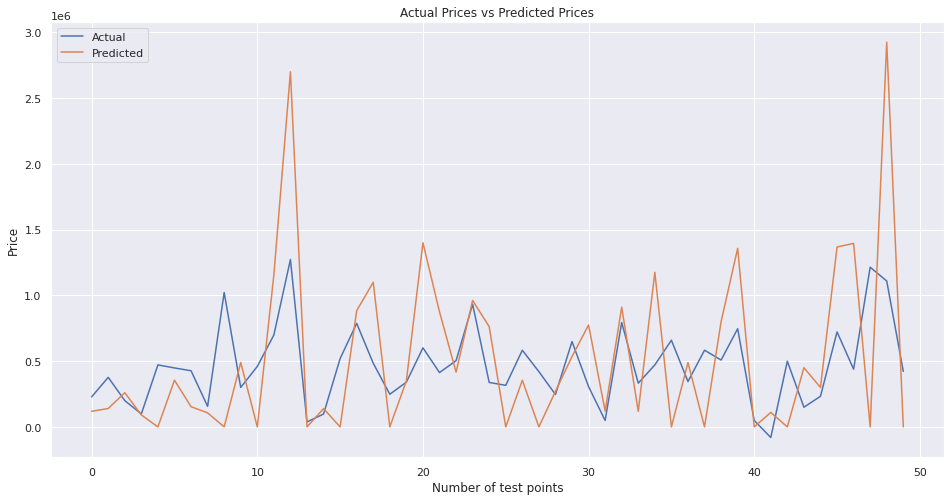

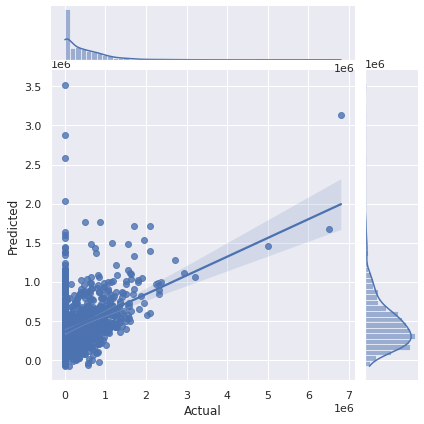

In [16]:
test= pd.DataFrame({'Predicted' :y_pred, 'Actual' :y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'], axis=1)
plt.plot(test[:50])
plt.legend(['Actual', 'Predicted'])
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Number of test points')
plt.ylabel('Price')
#, x='Number of test points', y='Pric


sns.jointplot(x='Actual', y='Predicted', data=test, kind='reg')

We can see that this model does not perform very well on our dataset, which makes sense since not all the features are linearly correlated to the price.

In [17]:
from sklearn import metrics

In [18]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

In [19]:
from sklearn.metrics import r2_score

In [20]:
print("MAE:"+str(np.sqrt(mean_absolute_error(y_train,LinearRegModel.predict(X_train)))))

MAE:612.8634807134774


In [21]:
r2_score(y_train,LinearRegModel.predict(X_train))

0.2743382610929246

In [22]:
print("MAE:"+str(np.sqrt(mean_absolute_error(y_test, y_pred))))

MAE:610.3071205690723


**Conclusion**: the R2 error is around 0.29 and the MAE error is 600. The model is not performing very well

### **5.b Other Linear Regression models**

**Ridge**: Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where linearly independent variables are highly correlated

**Lasso**: Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters)

**Bayesian**: Bayesian regression is an approach to linear regression in which the statistical analysis is undertaken within the context of Bayesian inference. When the regression model has errors that have a normal distribution, and if a particular form of prior distribution is assumed, explicit results are available for the posterior probability distributions of the model's parameters

**ElasticNet**: Elastic Net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods

In [175]:
#https://towardsdatascience.com/predicting-house-prices-with-machine-learning-62d5bcd0d68f

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

In [176]:
# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.21181071407766794
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.21180574275689457
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.212102708409862
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.21198266006129896
-------------------------------------------------------------------------------


In [177]:
# 2. R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.21135443972675005
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.21134962114852218
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.2116353564601099
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.21152049893389424
-------------------------------------------------------------------------------


In [181]:
print("MAE:"+str(np.sqrt(mean_absolute_error(y_train,lasso.predict(X_train)))))

MAE:609.6090350680691


In [182]:
print("MAE:"+str(np.sqrt(mean_absolute_error(y_train,ridge.predict(X_train)))))

MAE:609.6100313166567


In [183]:
print("MAE:"+str(np.sqrt(mean_absolute_error(y_train,bayesian.predict(X_train)))))

MAE:609.6869938926638


In [184]:
print("MAE:"+str(np.sqrt(mean_absolute_error(y_train,en.predict(X_train)))))

MAE:609.649431933933


**Conclusion**: the other linear regression models perform  less well than OLS regression but the difference is not that important

### **5.c Decision Tree**

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data)

In [38]:
dtReg= DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=9)

In [39]:
y_pred = dtReg.predict(X_test)

In [40]:
print(len(y_pred))
print(len(y_test))
print(y_pred[0:5])
print(y_test[0:5])

1000
1000
[525329.18556701 800833.18446602 464261.17721519 419204.46865672
 489818.86111111]
[    250       0       0       0 1330000]


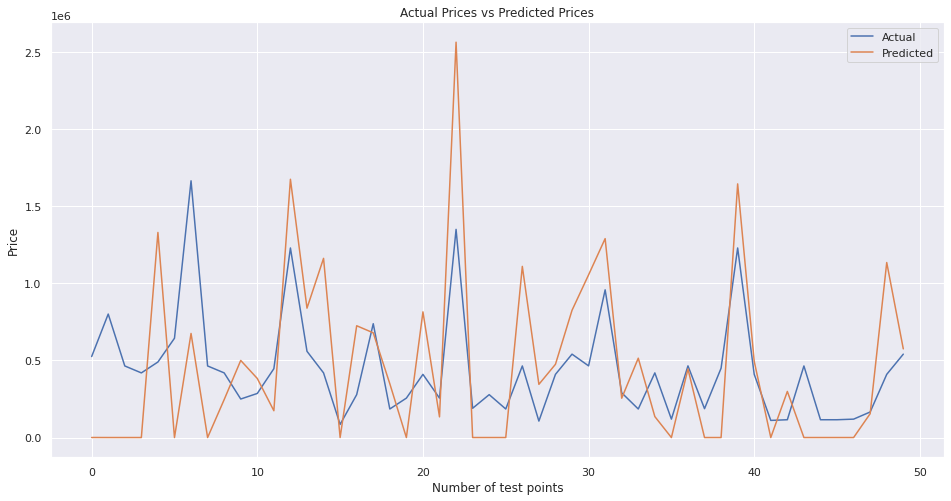

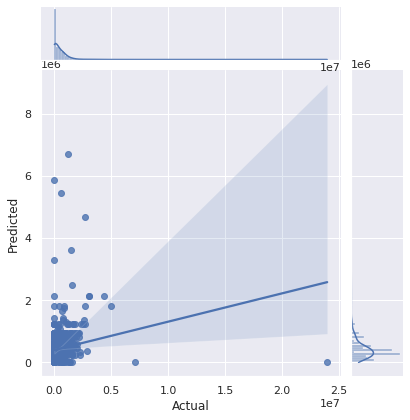

In [41]:
test= pd.DataFrame({'Predicted' :y_pred, 'Actual' :y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'], axis=1)
plt.plot(test[:50])
plt.legend(['Actual', 'Predicted'])
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Number of test points')
plt.ylabel('Price')
#, x='Number of test points', y='Pric


sns.jointplot(x='Actual', y='Predicted', data=test, kind='reg')

In [42]:
r2_score(y_train,LinearRegModel.predict(X_train))

0.17919131148911294

In [43]:
print("MAE:"+str(np.sqrt(mean_absolute_error(y_train,LinearRegModel.predict(X_train)))))

MAE:600.5996905983695


**Conclusion**: The decision tree model performs less well than the OLS regression

### **5.d Random Forest**

Random Forest is a “Tree”-based algorithm that uses the qualities features of multiple Decision Trees for making decisions

In [59]:
rfReg= RandomForestRegressor(30)
rfReg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30)

In [60]:
y_pred = rfReg.predict(X_test)

In [61]:
print(len(y_pred))
print(len(y_test))
print(y_pred[0:5])
print(y_test[0:5])

1000
1000
[465983.33333333 390250.         244400.         768583.33333333
 207980.55555556]
[      0       0       0 1810000  220000]


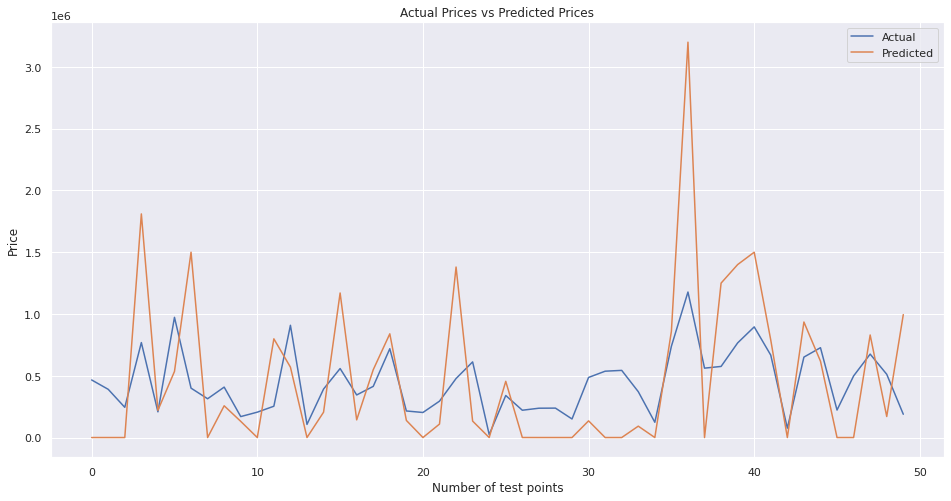

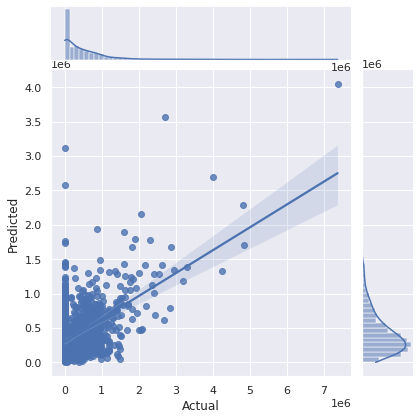

In [62]:
test= pd.DataFrame({'Predicted' :y_pred, 'Actual' :y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'], axis=1)
plt.plot(test[:50])
plt.legend(['Actual', 'Predicted'])
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Number of test points')
plt.ylabel('Price')
#, x='Number of test points', y='Pric


sns.jointplot(x='Actual', y='Predicted', data=test, kind='reg')

In [63]:
r2_score(y_train,LinearRegModel.predict(X_train))

0.22889244426151878

In [64]:
print("MAE:"+str(np.sqrt(mean_absolute_error(y_train,LinearRegModel.predict(X_train)))))

MAE:611.638813714267


**Conclusion**: The model performs better than the decision tree but not as well as the OLS method

##**6.Advanced Machine Learning Techniques**

Given our results, we can use advanced machine learning techniques to improve the performance

###**6.a K-fold cross-validation**

In k-fold cross-validation, we randomly split the training dataset into k folds without replacement, where k-1 folds are used for the model training, and one fold is used for performance evaluation. This procedure is repeated k times so that we obtain k models and performances.

The test dataset is used to calculate the accuracy score of the model, which is collected in the scores list to calculate the average accuracy and the standard deviation of the estimate.

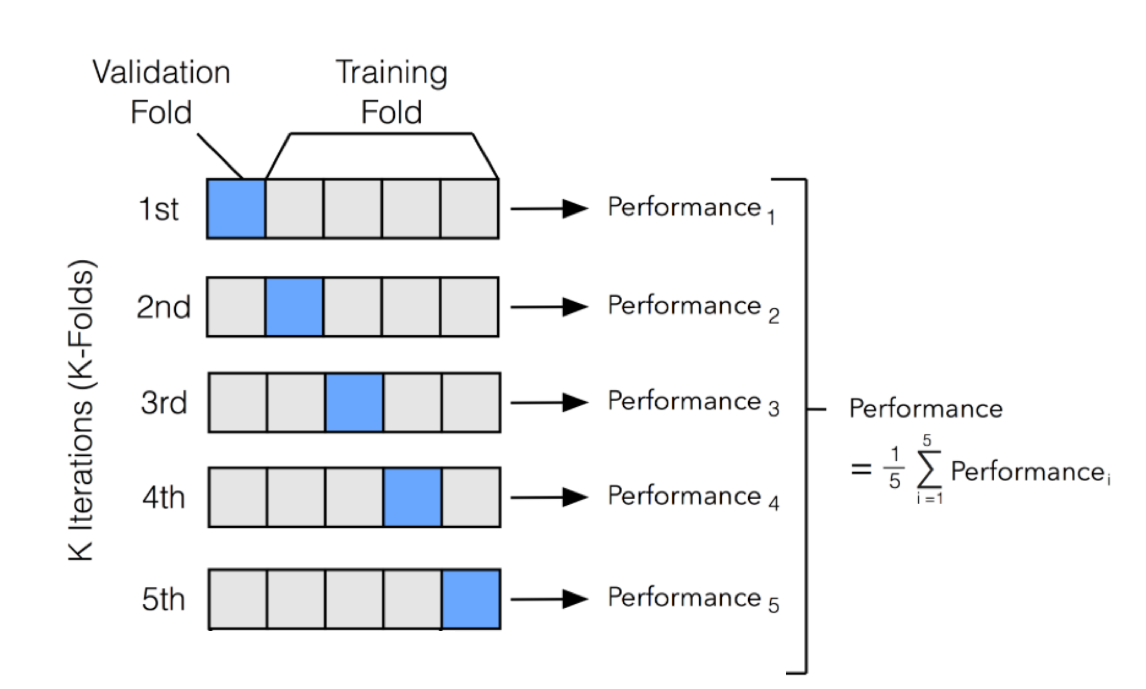

### **6.b Tuning hyperparameters via grid search**

The grid search approach is a brute-force exhaustive search paradigm where we specify a list of values for different hyperparameters, and the computer evaluates the model performance for each combination to obtain the optimal combination of values from this set

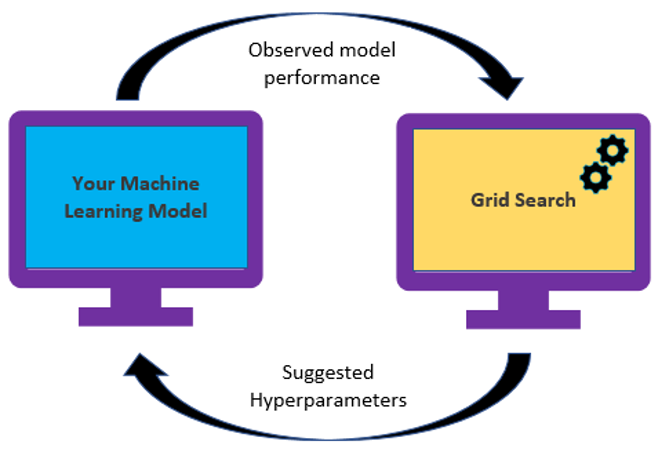

### **6.c Ensemble methods: bagging and boosting**

The goal of ensemble methods is to combine different classifiers into a meta-classifier that has better generalization performance than each individual classifier alone

- In bagging, the objective is to create several subsets of data from training sample chosen randomly with replacement. Each collection of subset data is used to train their decision trees. As a result, we get an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree classifier

- In boosting, the ensemble consists of very simple base classifiers, also referred to as weak learners. The key concept behind boosting is to focus on training examples that are hard to classify, that is, to let the weak learners subsquently learn from missclassified training examples to improve the performance of the ensemble

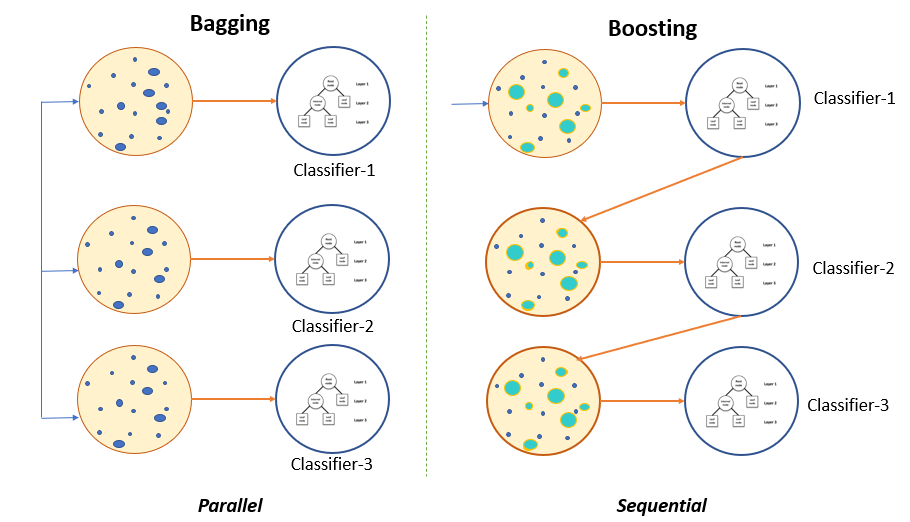

#### **6.c.1 Random Forest Classifier**

In [249]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs = -1)

max_depth = [1,2,3,4,5,None]
n_estimators = np.linspace(50,500,10,dtype=int)


parameters = dict(max_depth=max_depth, n_estimators = n_estimators)

gs_rfc = GridSearchCV(rfc, parameters, cv=2)

In [250]:
scores_lr = cross_val_score(gs_rfc, X_train, y_train, cv = 2)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_lr),
                                      np.std(scores_lr)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


CV accuracy: 0.353 +/- 0.000


In [ ]:
#view best regularization parameter
gs_rfc_fit = gs_rfc.fit(X_train, y_train)

print(gs_rfc_fit.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


In [114]:
gs_rfc_final= gs_rfc
gs_rfc_final.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None],
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])})

In [115]:
y_pred = gs_rfc_final.predict(X_test)

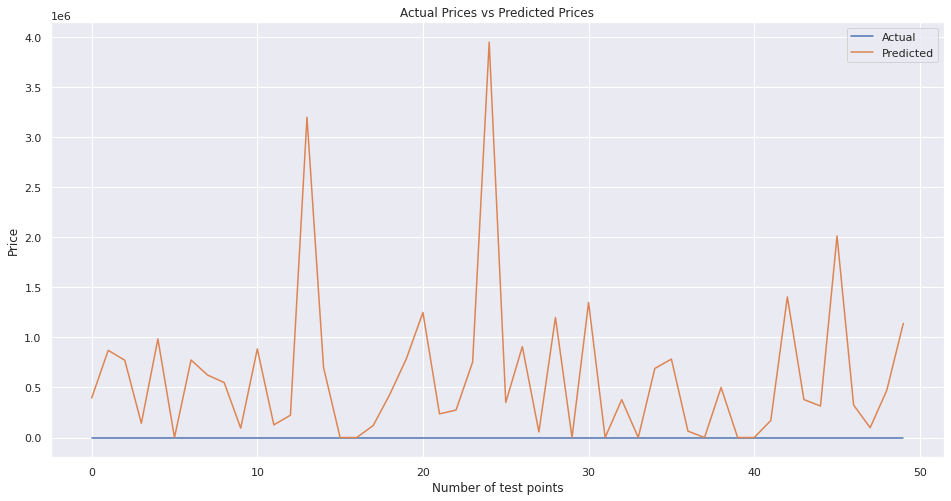

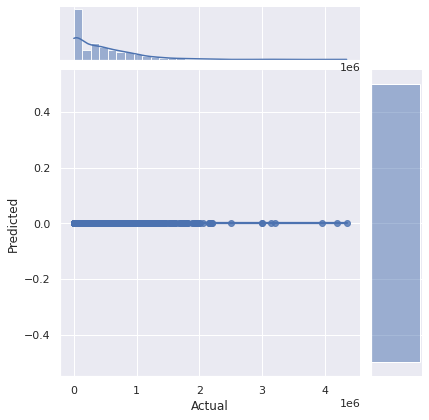

In [116]:
test= pd.DataFrame({'Predicted' :y_pred, 'Actual' :y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'], axis=1)
plt.plot(test[:50])
plt.legend(['Actual', 'Predicted'])
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Number of test points')
plt.ylabel('Price')
#, x='Number of test points', y='Pric


sns.jointplot(x='Actual', y='Predicted', data=test, kind='reg')

In [117]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_train, gs_rfc_final.predict(X_train))))

698787.8231940508
842988.9913072673


In [118]:
r2_score(y_train,gs_rfc_final.predict(X_train))

-0.38730786292026886

In [119]:
print("MAE:"+str(np.sqrt(mean_absolute_error(y_train,gs_rfc_final.predict(X_train)))))

MAE:667.3932626270661


#### **6.c.2 Gradient Boosting Regressor**

In [217]:
from sklearn.ensemble import GradientBoostingRegressor

In [218]:
gbr = GradientBoostingRegressor(random_state=0, max_features='sqrt')

max_depth = [5,10,30]
n_estimators = np.linspace(50,500,10,dtype=int)
learning_rate=[0.01, 0.05, 0.1]


parameters = dict(max_depth=max_depth, n_estimators = n_estimators, learning_rate=learning_rate)

gs_gbr = GridSearchCV(gbr, parameters, cv=2)

In [219]:
scores_lr = cross_val_score(gs_gbr, X_train, y_train, cv = 5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_lr),
                                      np.std(scores_lr)))

CV accuracy: -0.024 +/- 0.475


In [220]:
#view best regularization parameter
gs_gbr_fit = gs_gbr.fit(X_train, y_train)

print(gs_gbr_fit.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}


In [221]:
gs_gbr_final= GradientBoostingRegressor(max_depth=5, learning_rate=0.01, n_estimators=250)
gs_gbr_final.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=250)

In [222]:
y_pred = gs_gbr_final.predict(X_test)

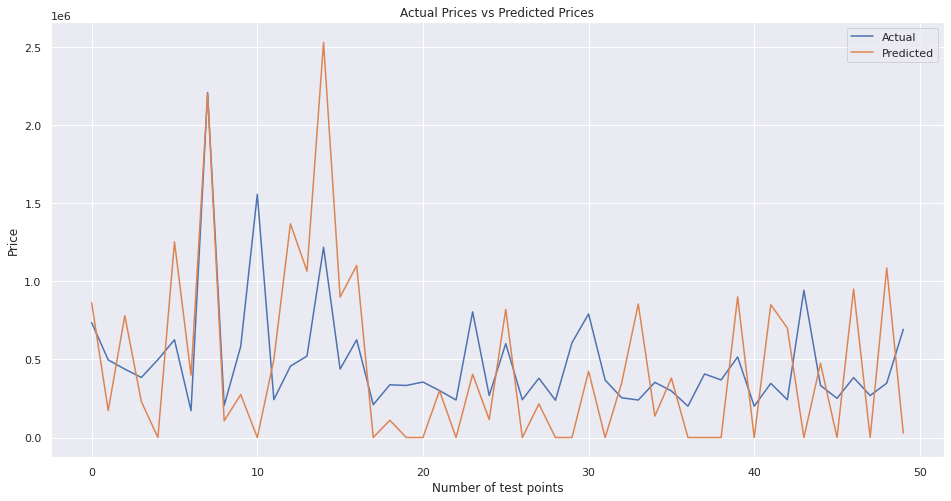

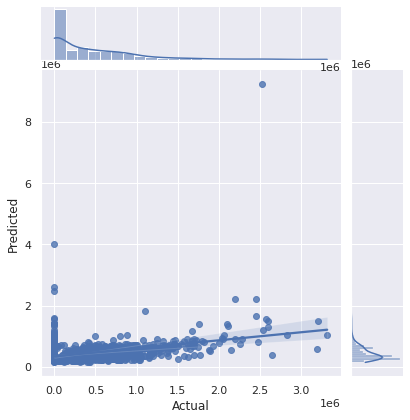

In [231]:
test= pd.DataFrame({'Predicted' :y_pred, 'Actual' :y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'], axis=1)
plt.plot(test[:50])
plt.legend(['Actual', 'Predicted'])
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Number of test points')
plt.ylabel('Price')
#, x='Number of test points', y='Pric


sns.jointplot(x='Actual', y='Predicted', data=test, kind='reg')

In [228]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_train, gs_gbr_final.predict(X_train))))

546821.1382780772
449964.49208042136


In [229]:
r2_score(y_train,gs_gbr_final.predict(X_train))

0.679152961670166

In [230]:
print("MAE:"+str(np.sqrt(mean_absolute_error(y_train,gs_gbr_final.predict(X_train)))))

MAE:573.8086114768751


#**Learning Curve**

### **Gradient Boosting Regressor**

In [232]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


gradient = gs_gbr_final

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=gradient,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=2,
                               n_jobs=-1)

In [233]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)

<Figure size 864x576 with 0 Axes>

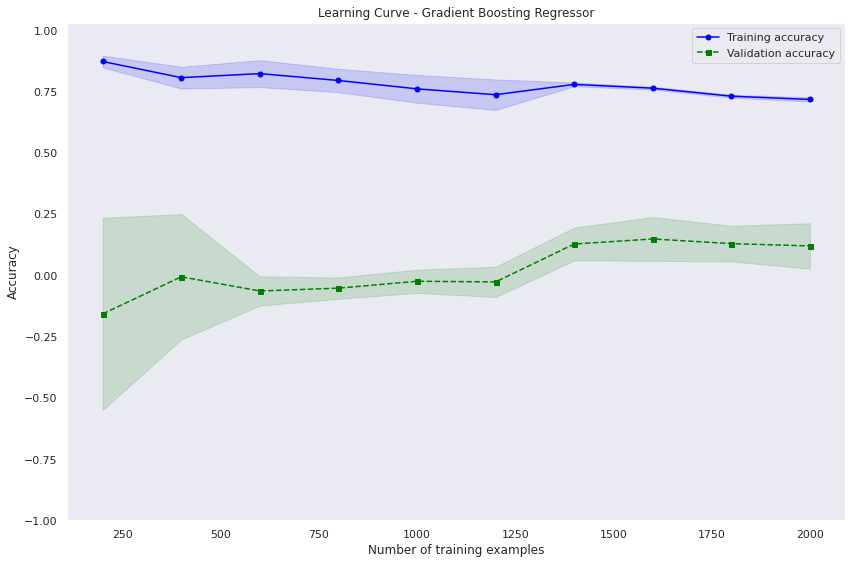

In [236]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)
plt.title('Learning Curve - Gradient Boosting Regressor')
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.ylim([-1, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

**Conclusion**: The model is overfitting (high bias). It performs better on training data than on test data.

### **Random Forest Classifier**

In [106]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


forest = gs_rfc_final

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=forest,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=2,
                               n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


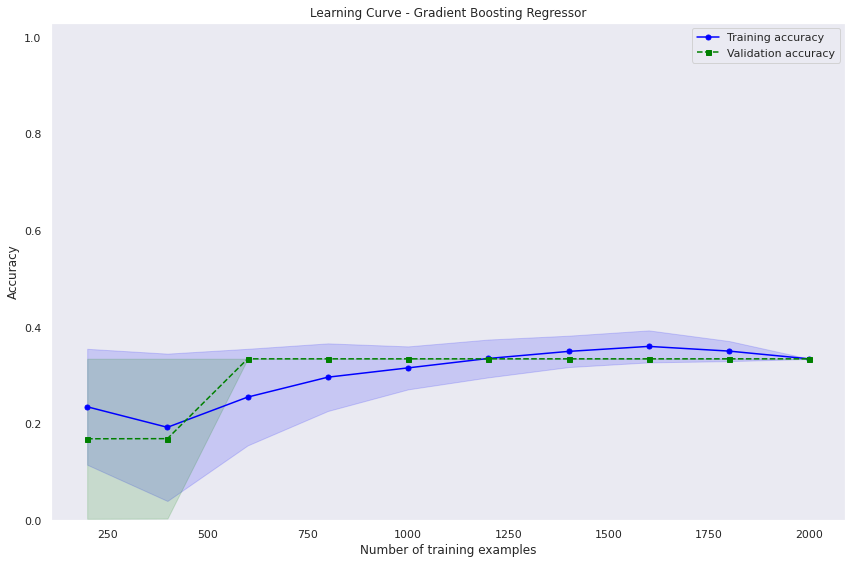

In [107]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)
plt.title('Learning Curve - Gradient Boosting Regressor')
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.ylim([0, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

## **7. Conclusion**